In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATA TRAINED /Data.csv")
data.head(8)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low


##Exploratory data analysis

In [ ]:
data.shape

(14214, 10)

In [ ]:
print(data.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14214 entries, 0 to 14213
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14214 non-null  float64
 1   last_evaluation        14214 non-null  float64
 2   number_project         14214 non-null  int64  
 3   average_montly_hours   14214 non-null  int64  
 4   time_spend_company     14214 non-null  int64  
 5   Work_accident          14214 non-null  int64  
 6   left                   14214 non-null  int64  
 7   promotion_last_5years  14214 non-null  int64  
 8   Departments            14214 non-null  object 
 9   salary                 14214 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000
mean,0.622318,0.716246,3.802167,200.747995,3.477206,0.150134,0.196004,0.022091
std,0.244318,0.169581,1.192028,49.224225,1.479143,0.357215,0.396985,0.146984
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.460000,0.560000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,244.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb14f2d6410>,
      dtype=object)

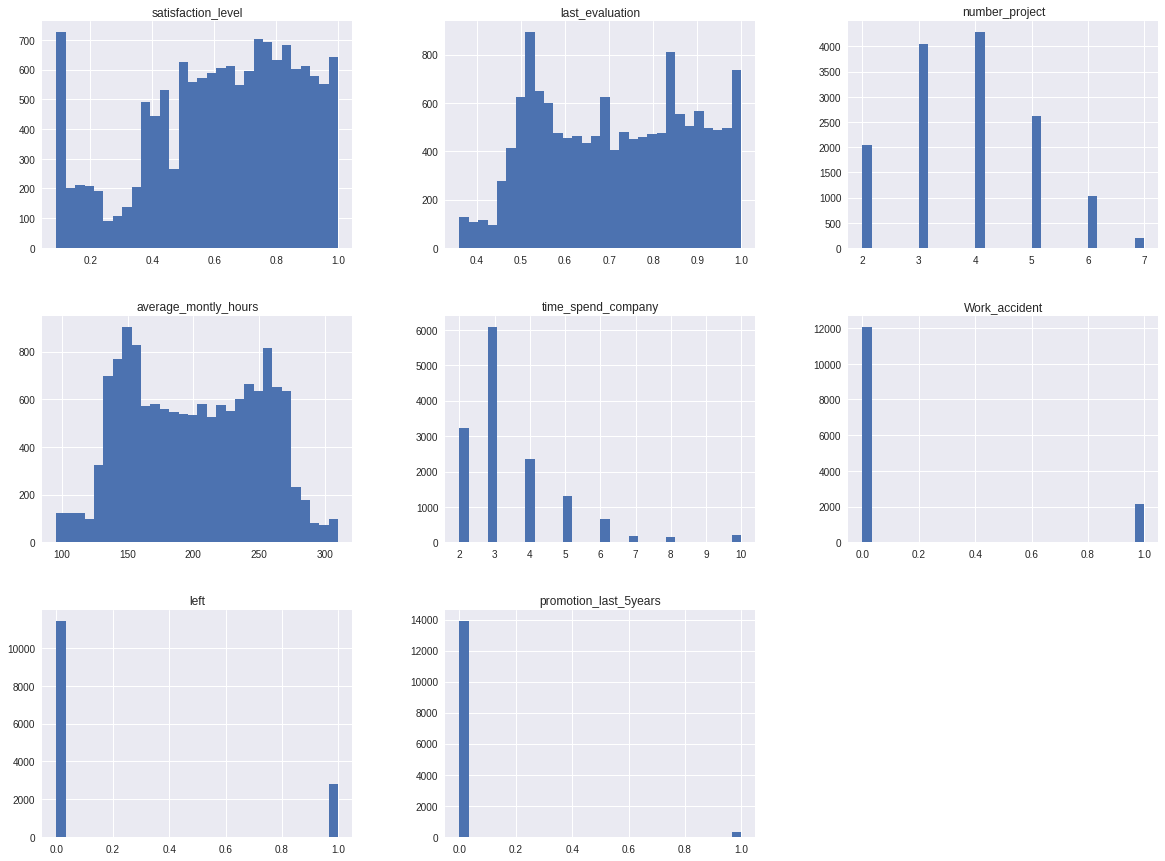

In [ ]:
# Libraries and configurations for figure plotting
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
data.hist(bins=30, figsize=(20,15)) # plotting the histogram

In [ ]:
data['number_project'].unique()

array([2, 5, 7, 6, 4, 3])

In [ ]:
data['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [ ]:
data['Work_accident'].unique()

array([0, 1])

In [ ]:
data['left'].unique()

array([1, 0])

In [ ]:
data['promotion_last_5years'].unique()

array([0, 1])

In [ ]:
data['Departments '].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
print(data.salary.value_counts())

low       6819
medium    6175
high      1220
Name: salary, dtype: int64


In [ ]:
print(data["Departments "])

0            sales
1            sales
2            sales
3            sales
4            sales
           ...    
14209    marketing
14210           IT
14211        sales
14212        sales
14213        sales
Name: Departments , Length: 14214, dtype: object


####Label Encoding

In [ ]:
data.head(8)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
dept=enc.fit_transform(data['Departments '])

In [ ]:
salary=enc.fit_transform(data['salary'])

In [ ]:
data['salary']=salary

In [ ]:
print(data.salary.value_counts())

1    6819
2    6175
0    1220
Name: salary, dtype: int64


In [ ]:
data['Departments ']=dept

In [ ]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14209,0.33,0.65,3,172,10,0,0,1,5,0
14210,0.50,0.73,4,180,3,0,0,0,0,1
14211,0.38,0.53,2,157,3,0,1,0,7,1
14212,0.80,0.86,5,262,6,0,1,0,7,2


In [ ]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64


##Outlier Detection

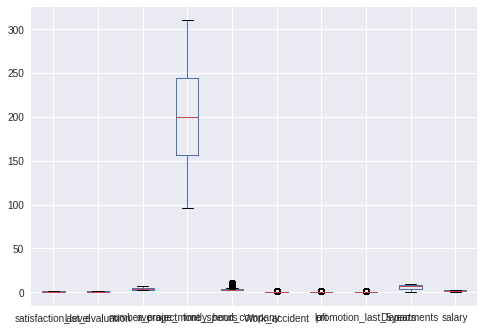

In [ ]:
data.plot(kind='box')
plt.show()

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

satisfaction_level        0.36
last_evaluation           0.31
number_project            2.00
average_montly_hours     87.00
time_spend_company        1.00
Work_accident             0.00
left                      0.00
promotion_last_5years     0.00
Departments               4.00
salary                    1.00
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

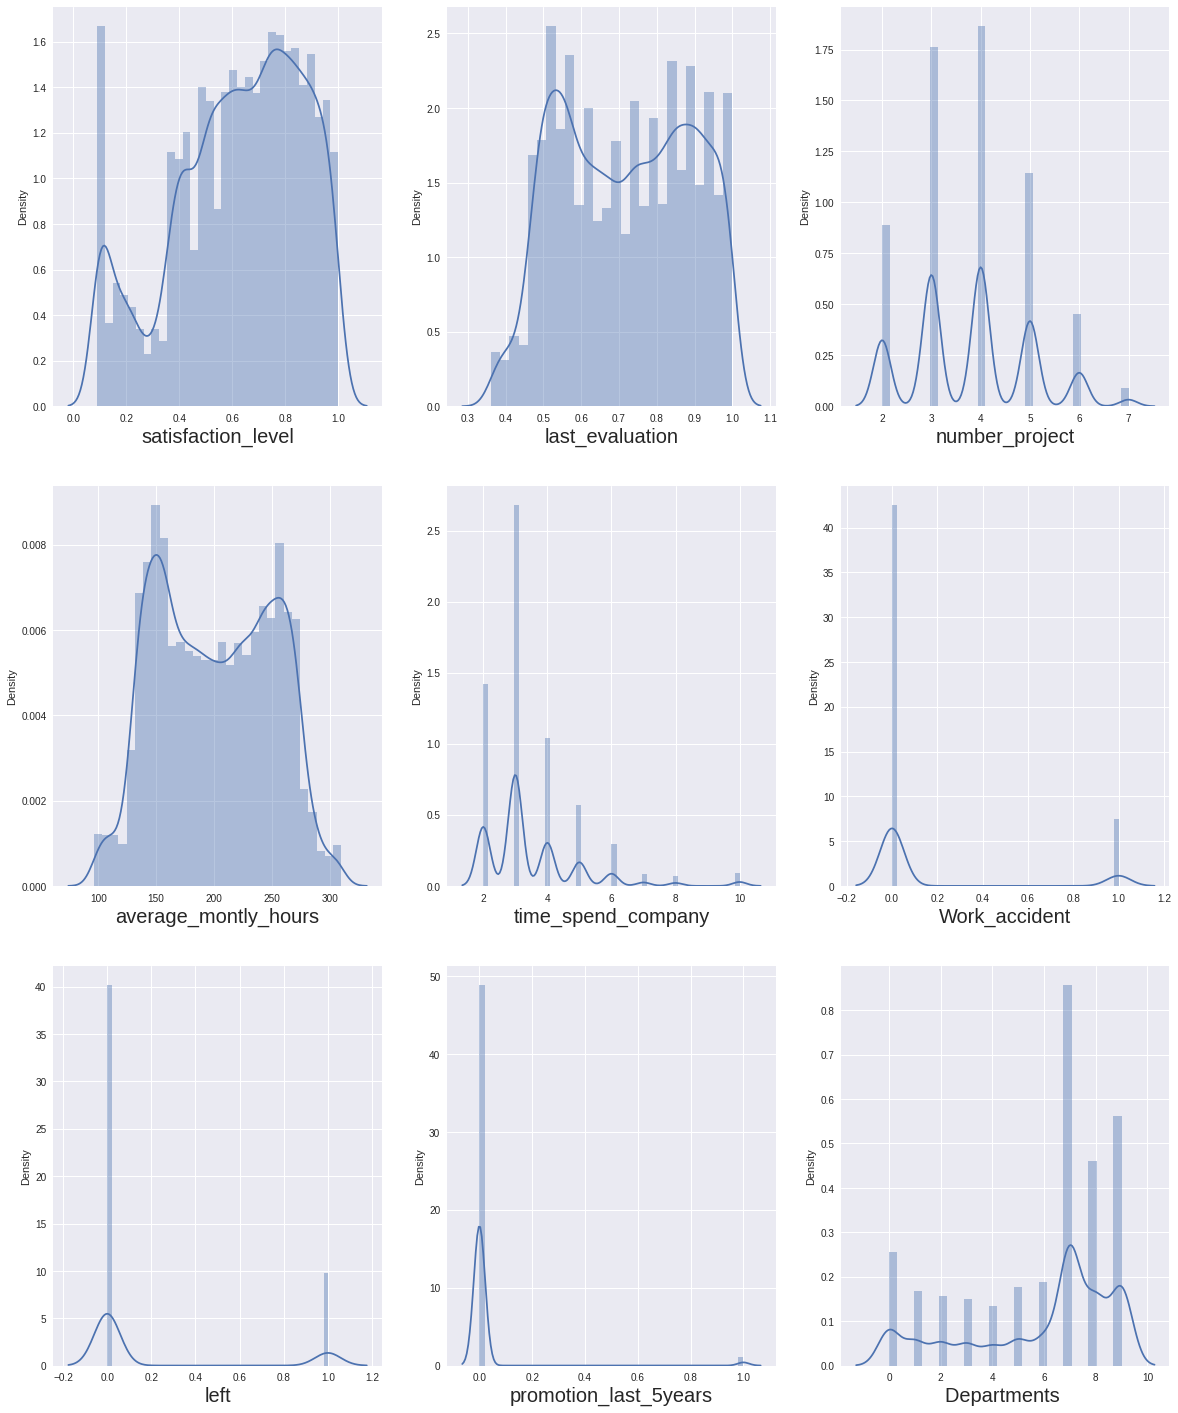

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Work_accident, left, promotion_last_5years  which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.

In [ ]:
# replacing zero values with the mean of the column
data['Work_accident'] = data['Work_accident'].replace(0,data['Work_accident'].mean())
data['left'] = data['left'].replace(0,data['left'].mean())
data['promotion_last_5years'] = data['promotion_last_5years'].replace(0,data['promotion_last_5years'].mean())

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.
Let's deal with them.

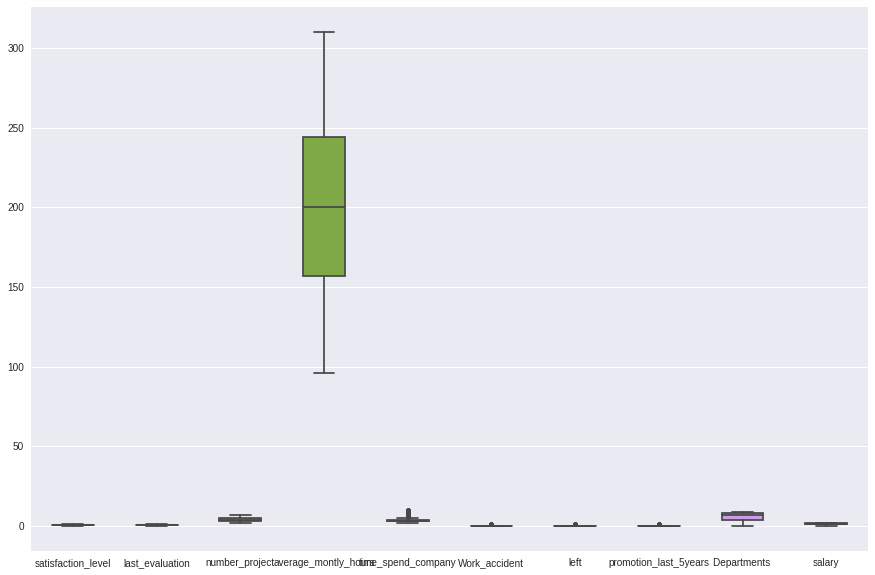

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
q = data['average_montly_hours'].quantile(0.98)
# we are removing the top 7% data from the Pregnancies column
data_cleaned = data[data['average_montly_hours']<q]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

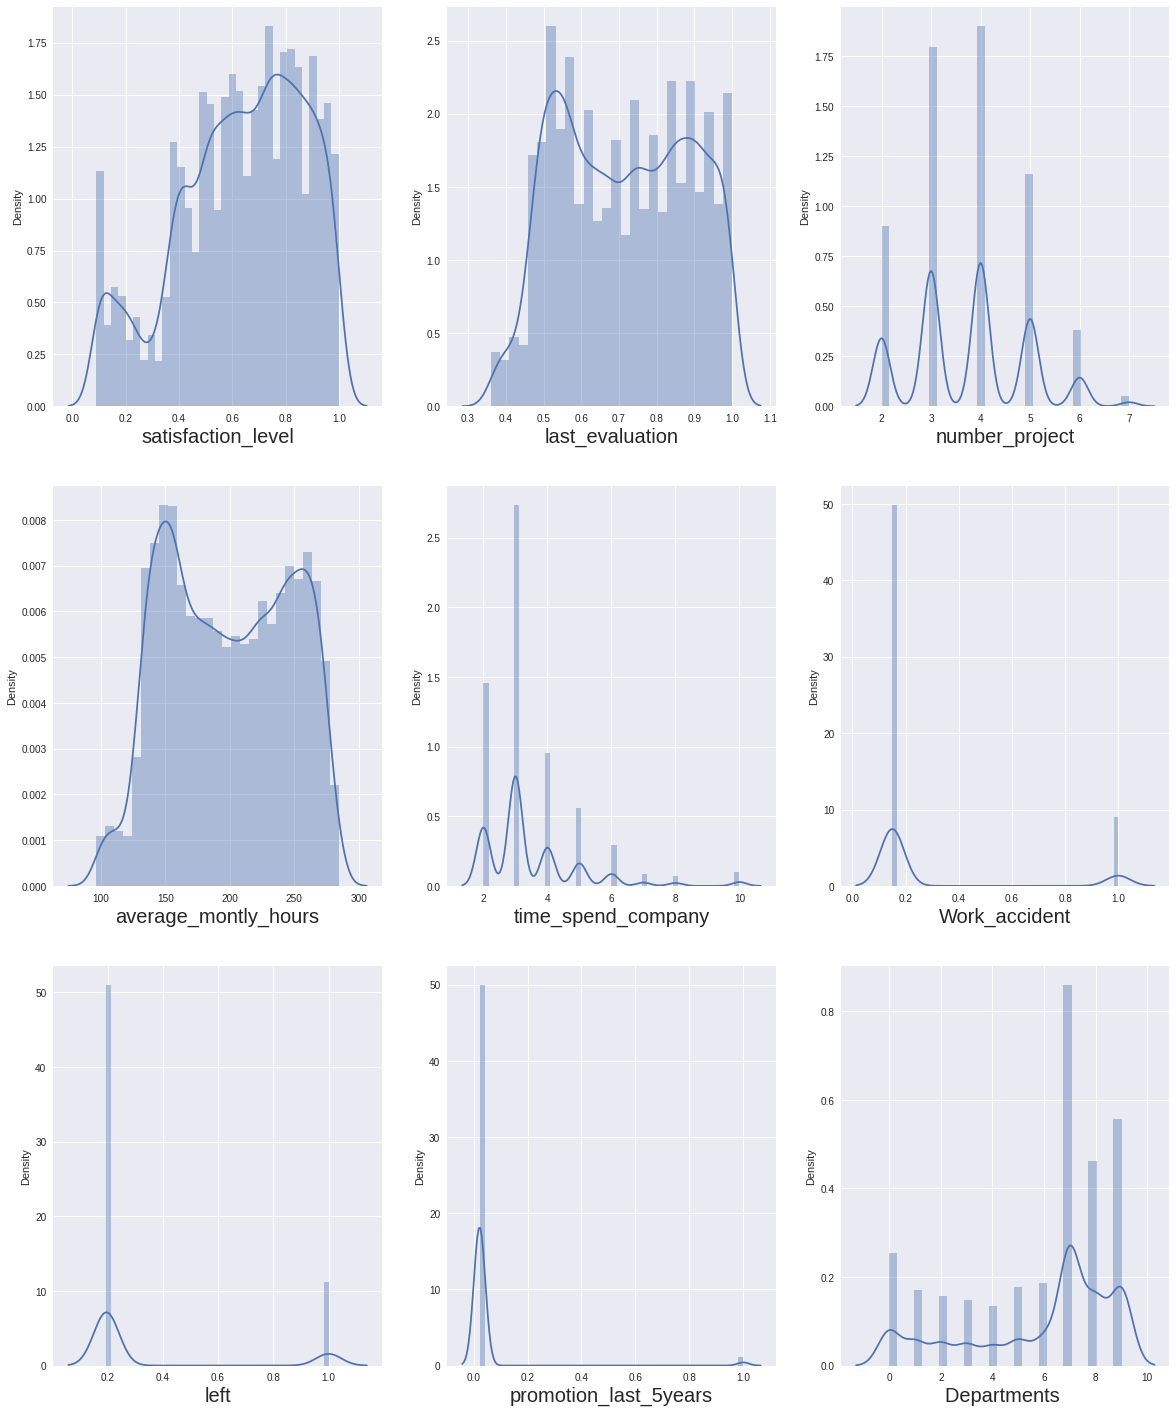

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

The data looks much better now than before.

## Spliting of data for training and testing


In [ ]:
X=data.drop('salary',axis=1)

In [ ]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments
0,0.38,0.53,2,157,3,0.150134,1.0,0.022091,7
1,0.80,0.86,5,262,6,0.150134,1.0,0.022091,7
2,0.11,0.88,7,272,4,0.150134,1.0,0.022091,7
3,0.72,0.87,5,223,5,0.150134,1.0,0.022091,7
4,0.37,0.52,2,159,3,0.150134,1.0,0.022091,7


In [ ]:
Y=data['salary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments
5683,0.65,0.76,4,193,2,0.150134,0.196004,0.022091,3
11215,0.52,0.84,3,261,8,0.150134,0.196004,1.000000,2
9507,0.53,0.58,4,134,2,0.150134,0.196004,0.022091,9
13973,0.81,0.90,4,270,10,0.150134,0.196004,0.022091,2
8912,0.47,0.53,4,181,3,0.150134,0.196004,0.022091,9
...,...,...,...,...,...,...,...,...,...
11633,0.77,0.89,4,269,10,0.150134,0.196004,0.022091,4
1344,0.39,0.57,2,150,3,0.150134,1.000000,0.022091,8
12815,0.80,0.67,3,236,3,1.000000,0.196004,0.022091,1
7293,0.97,0.64,4,152,2,0.150134,0.196004,0.022091,9


In [ ]:
Y_train

5683     2
11215    1
9507     1
13973    2
8912     1
        ..
11633    0
1344     1
12815    1
7293     2
1289     1
Name: salary, Length: 11371, dtype: int64

In [ ]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments
1047,0.37,0.49,2,151,3,0.150134,1.000000,0.022091,9
8140,0.89,0.85,4,201,2,1.000000,0.196004,0.022091,8
12428,0.37,0.45,2,126,3,0.150134,1.000000,0.022091,8
8122,0.82,0.94,3,253,2,0.150134,0.196004,0.022091,3
8393,0.72,0.57,4,224,4,0.150134,0.196004,0.022091,1
...,...,...,...,...,...,...,...,...,...
12764,0.83,0.99,4,223,5,0.150134,1.000000,0.022091,2
79,0.39,0.56,2,142,3,0.150134,1.000000,0.022091,2
4278,0.83,0.88,3,217,2,1.000000,0.196004,0.022091,8
12187,0.40,0.46,2,143,3,0.150134,1.000000,0.022091,3


In [ ]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments
5683,0.65,0.76,4,193,2,0.150134,0.196004,0.022091,3
11215,0.52,0.84,3,261,8,0.150134,0.196004,1.000000,2
9507,0.53,0.58,4,134,2,0.150134,0.196004,0.022091,9
13973,0.81,0.90,4,270,10,0.150134,0.196004,0.022091,2
8912,0.47,0.53,4,181,3,0.150134,0.196004,0.022091,9
...,...,...,...,...,...,...,...,...,...
11633,0.77,0.89,4,269,10,0.150134,0.196004,0.022091,4
1344,0.39,0.57,2,150,3,0.150134,1.000000,0.022091,8
12815,0.80,0.67,3,236,3,1.000000,0.196004,0.022091,1
7293,0.97,0.64,4,152,2,0.150134,0.196004,0.022091,9


##Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

##Checking the Multicolinearity

In [ ]:
X_train_std

array([[ 0.11329804,  0.24493333,  0.16077205, ..., -0.49171358,
        -0.15085056, -0.9924884 ],
       [-0.4183863 ,  0.71725062, -0.67667136, ..., -0.49171358,
         6.62907716, -1.34017581],
       [-0.3774875 , -0.81778055,  0.16077205, ..., -0.49171358,
        -0.15085056,  1.09363605],
       ...,
       [ 0.72677998, -0.28642361, -0.67667136, ..., -0.49171358,
        -0.15085056, -1.68786322],
       [ 1.42205951, -0.46354259,  0.16077205, ..., -0.49171358,
        -0.15085056,  1.09363605],
       [-0.78647546, -0.93585987,  1.83565887, ...,  2.03370426,
        -0.15085056,  0.05057383]])

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_train_std,i) for i in range(X_train_std.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.224667,satisfaction_level
1,1.186979,last_evaluation
2,1.282671,number_project
3,1.226927,average_montly_hours
4,1.068652,time_spend_company
5,1.022447,Work_accident
6,1.214437,left
7,1.011979,promotion_last_5years
8,1.002548,Departments


All the VIF values are less than 5 and are very low. That means no multicollinearity. 

##Train our Model

##Decision Tree

In [ ]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt.feature_importances_


array([0.2437118 , 0.22108517, 0.06509044, 0.29466255, 0.05521434,
       0.03051303, 0.00896034, 0.0054252 , 0.07533713])

In [ ]:
Y_pred=dt.predict(X_test_std)


In [ ]:
Y_pred


array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_dt


0.5663032008441787

##Logistic Regression

In [ ]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train_std,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred_lr=lr.predict(X_test_std)


In [ ]:
Y_pred_lr

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)


In [ ]:
ac_lr

0.5036932817446359

##Confusion Matrix

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred_lr)
conf_mat

array([[   0,  138,   99],
       [   0, 1035,  332],
       [   0,  842,  397]])

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8823529411764706

In [ ]:
ac_lrr = Accuracy

##KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred=knn.predict(X_test_std)


In [ ]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [ ]:
knn.score(X_train,Y_train)

0.4639873362061384

In [ ]:
ac_knn

0.4854027435807246

In [ ]:
print("The accuracy score is : ", accuracy_score(Y_test,Y_pred))

The accuracy score is :  0.4854027435807246


##Random Forest

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train_std,Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred=rf.predict(X_test_std)

In [ ]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_rf

0.5867041857193106

##SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv=SVC()

In [ ]:
sv.fit(X_train_std,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred=sv.predict(X_test_std)

In [ ]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_sv

0.507914175167077

####Accuracy of all the models

##Plotting all the models accuracy

In [ ]:
ac_dt

0.5663032008441787

In [ ]:
ac_lrr

0.8823529411764706

In [ ]:
ac_knn

0.4854027435807246

In [ ]:
ac_rf

0.5867041857193106

In [ ]:
ac_sv

0.507914175167077

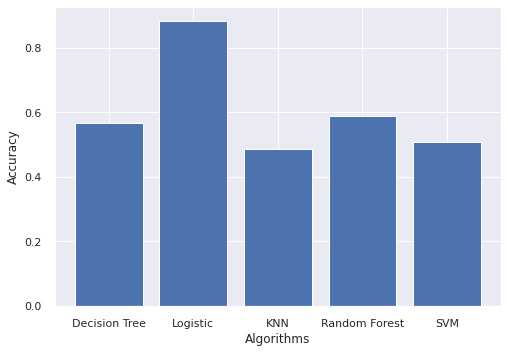

In [ ]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lrr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()